In [326]:
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support,roc_auc_score,plot_det_curve,plot_roc_curve
import numpy as np 
from tqdm import tqdm
from  collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
tqdm.pandas()

In [18]:
seed = 777

In [2]:
df = pd.read_csv("home_ex_raw_data.csv")
df = df.where(pd.notnull(df), None)

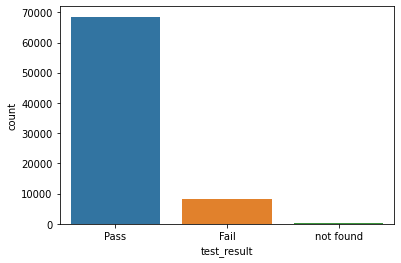

In [3]:
ax = sns.countplot(x="test_result", data=df)

In [4]:
df = df[df['test_result'] != 'not found']
len(df)

76722

In [5]:
df.sample(5)

,serial_number,mesaurement_#_0,mesaurement_#_1,mesaurement_#_2,mesaurement_#_3,mesaurement_#_4,mesaurement_#_5,mesaurement_#_6,mesaurement_#_7,mesaurement_#_8,...,mesaurement_#_1554,mesaurement_#_1555,mesaurement_#_1556,mesaurement_#_1557,mesaurement_#_1558,mesaurement_#_1559,mesaurement_#_1560,mesaurement_#_1561,mesaurement_#_1562,test_result
21543,SZ1218-020518E38-37,24723709,247.0,3,159.0,20809,20671,1,21389,3,...,20672,1,21390,3,3,2276,2.020000e+13,320373,3,Pass
8693,SZ1218-020515142-04,24666861,225.0,3,159.0,8374,8341,1,8594,3,...,8341,1,8594,3,3,2276,2.020000e+13,320373,3,Fail
54248,SZ1418-02052197E-09,24873912,225.0,1,159.0,52837,52451,1,53170,1,...,52456,1,53176,1,1,2339,2.020000e+13,333097,1,Fail
16243,SZ1218-02051770E-F6,24706033,361.0,3,159.0,15633,15588,1,16124,3,...,15588,1,16124,3,3,2276,2.020000e+13,320373,3,Pass
34670,SZ1218-02051BD42-70,24782432,225.0,3,159.0,33640,33388,1,34462,3,...,33391,1,34466,3,3,2276,2.020000e+13,320373,3,Pass


In [6]:
df.describe()

,mesaurement_#_0,mesaurement_#_1,mesaurement_#_2,mesaurement_#_3,mesaurement_#_4,mesaurement_#_5,mesaurement_#_6,mesaurement_#_7,mesaurement_#_8,mesaurement_#_9,...,mesaurement_#_1553,mesaurement_#_1554,mesaurement_#_1555,mesaurement_#_1556,mesaurement_#_1557,mesaurement_#_1558,mesaurement_#_1559,mesaurement_#_1560,mesaurement_#_1561,mesaurement_#_1562
count,7.672200e+04,76715.000000,76722.000000,76715.000000,76722.000000,76722.000000,76722.000000,76722.000000,76722.000000,76722.000000,...,76722.000000,76722.000000,76722.0,76722.000000,76722.000000,76722.000000,76722.000000,7.672200e+04,76722.000000,76722.000000
mean,2.480031e+07,276.768846,1.970439,159.002998,37548.263406,37263.030448,0.999909,37819.126900,1.970439,1.970439,...,37554.241143,37269.222009,1.0,37826.100949,1.970660,1.970660,2309.933956,2.020000e+13,327251.642541,1.970660
std,9.739541e+04,47.469874,0.988938,0.262580,21765.802688,21577.843451,0.009552,21624.283181,0.988938,0.988938,...,21765.206840,21577.576954,0.0,21624.291977,0.988806,0.988806,32.734212,0.000000e+00,6665.331625,0.988806
min,2.463134e+07,221.000000,0.000000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,2276.000000,2.020000e+13,320373.000000,1.000000
25%,2.471646e+07,246.000000,1.000000,159.000000,18622.250000,18517.250000,1.000000,19062.250000,1.000000,1.000000,...,18629.250000,18524.250000,1.0,19069.250000,1.000000,1.000000,2276.000000,2.020000e+13,320373.000000,1.000000
50%,2.480072e+07,249.000000,1.000000,159.000000,37505.500000,37221.500000,1.000000,38278.500000,1.000000,1.000000,...,37511.500000,37227.000000,1.0,38285.500000,1.000000,1.000000,2339.000000,2.020000e+13,333097.000000,1.000000
75%,2.488558e+07,316.000000,3.000000,159.000000,56443.750000,55983.750000,1.000000,56561.750000,3.000000,3.000000,...,56449.750000,55989.750000,1.0,56568.750000,3.000000,3.000000,2339.000000,2.020000e+13,333097.000000,3.000000
max,2.496791e+07,361.000000,3.000000,182.000000,75298.000000,74711.000000,1.000000,74779.000000,3.000000,3.000000,...,75303.000000,74717.000000,1.0,74786.000000,3.000000,3.000000,2378.000000,2.020000e+13,342144.000000,3.000000


In [8]:
single_unique_value_columns = df.columns[df.nunique() == 1].tolist()
single_unique_value_columns[0:10]

['mesaurement_#_11',
 'mesaurement_#_26',
 'mesaurement_#_40',
 'mesaurement_#_53',
 'mesaurement_#_68',
 'mesaurement_#_83',
 'mesaurement_#_98',
 'mesaurement_#_113',
 'mesaurement_#_126',
 'mesaurement_#_143']

In [9]:
len(single_unique_value_columns), len(df.columns)

(102, 1565)

In [10]:
df.drop(columns=single_unique_value_columns, inplace = True)
len(df.columns)

1463

In [11]:
columns_with_missing_values = df.columns[df.isna().any()].tolist()
len(columns_with_missing_values)

623

In [12]:
columns_with_missing_values[0:10]

['mesaurement_#_1',
 'mesaurement_#_3',
 'mesaurement_#_10',
 'mesaurement_#_12',
 'mesaurement_#_14',
 'mesaurement_#_16',
 'mesaurement_#_18',
 'mesaurement_#_25',
 'mesaurement_#_28',
 'mesaurement_#_30']

In [13]:
df[columns_with_missing_values].describe()

,mesaurement_#_1,mesaurement_#_3,mesaurement_#_10,mesaurement_#_12,mesaurement_#_14,mesaurement_#_16,mesaurement_#_18,mesaurement_#_25,mesaurement_#_28,mesaurement_#_30,...,mesaurement_#_1523,mesaurement_#_1525,mesaurement_#_1531,mesaurement_#_1533,mesaurement_#_1534,mesaurement_#_1536,mesaurement_#_1538,mesaurement_#_1544,mesaurement_#_1546,mesaurement_#_1548
count,76715.000000,76715.000000,76715.000000,7.671500e+04,76715.000000,76699.000000,76699.000000,76699.000000,76699.000000,76683.000000,...,75050.000000,75050.000000,75050.000000,75050.000000,75050.000000,75028.000000,75028.000000,75028.000000,75028.000000,75028.000000
mean,276.768846,159.002998,2309.935410,5.422281e+08,518422.634961,276.768563,159.002999,2309.936740,327246.212206,276.770914,...,276.777255,159.003065,2309.936616,109.289420,327253.223371,276.781548,159.003066,2309.933971,110.289305,327246.696673
std,47.469874,0.262580,32.734222,2.248565e+04,3.466666,47.468305,0.262608,32.734395,6665.382341,47.467770,...,47.461126,0.265477,32.736290,1.601702,6665.839921,47.463398,0.265516,32.736869,1.601903,6665.973715
min,221.000000,159.000000,2276.000000,5.421893e+08,518419.000000,221.000000,159.000000,2276.000000,320367.000000,221.000000,...,221.000000,159.000000,2276.000000,99.000000,320374.000000,221.000000,159.000000,2276.000000,100.000000,320368.000000
25%,246.000000,159.000000,2276.000000,5.422086e+08,518419.000000,246.000000,159.000000,2276.000000,320367.000000,246.000000,...,246.000000,159.000000,2276.000000,109.000000,320374.000000,246.000000,159.000000,2276.000000,110.000000,320368.000000
50%,249.000000,159.000000,2339.000000,5.422283e+08,518426.000000,249.000000,159.000000,2339.000000,333091.000000,249.000000,...,249.000000,159.000000,2339.000000,110.000000,333098.000000,249.000000,159.000000,2339.000000,111.000000,333092.000000
75%,316.000000,159.000000,2339.000000,5.422474e+08,518426.000000,316.000000,159.000000,2339.000000,333091.000000,316.000000,...,316.000000,159.000000,2339.000000,110.000000,333098.000000,316.000000,159.000000,2339.000000,111.000000,333092.000000
max,361.000000,182.000000,2378.000000,5.422722e+08,518426.000000,361.000000,182.000000,2378.000000,342138.000000,361.000000,...,361.000000,182.000000,2378.000000,110.000000,342145.000000,361.000000,182.000000,2378.000000,111.000000,342139.000000


In [14]:
for column in tqdm(columns_with_missing_values, total = len(columns_with_missing_values)):
    column_mean_value = df[df[column].notnull()][column].mean()
    df[column] = df[column].fillna(column_mean_value)

100%|██████████████████████████████████████| 623/623 [06:05<00:00,  1.70it/s]


In [16]:
len(df.columns[df.isna().any()].tolist())

0

In [17]:
label_map = {'Pass': 1, 'Fail': 0}
df['test_result'] = df['test_result'].apply(lambda test_result: label_map[test_result])

In [255]:
VALIDATION_SIZE = 0.15
TEST_SIZE = 0.15 

In [257]:
X = df.drop(columns=['test_result', "serial_number"])

Y = df['test_result'].tolist()
X_train, X_eval, y_train, y_eval = train_test_split(X, Y, test_size=TEST_SIZE + VALIDATION_SIZE, random_state=seed)
X_validation, X_test, y_validation, y_test = train_test_split(X_eval, y_eval, test_size=TEST_SIZE/(TEST_SIZE + VALIDATION_SIZE)) 

assert  X_train.shape[0] + X_validation.shape[0]+ X_test.shape[0] == df.shape[0]

In [259]:
rus = RandomUnderSampler(random_state=seed)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
sorted(Counter(y_train_resampled).items())

[(0, 5764), (1, 5764)]

In [260]:
y_counter = Counter(y_train)
scale_pos_weight = y_counter[0]/y_counter[1]
scale_pos_weight

0.12023111741515613

### evaluation

In [261]:
def get_model_precision_recall_fscore(model, features_df, y):
    eval_predictions = model.predict(features_df)
    return precision_recall_fscore_support(y, eval_predictions, average='binary')

def get_model_roc_auc_score(model, features_df, y):
    eval_probs = model.predict_proba(features_df)
    return roc_auc_score(y, eval_probs[:,1])


### Train

In [334]:
def train_model_and_plot(model, train_features_df, train_y, validation_features_df, validation_y):
    model.fit(train_features_df, train_y)
    _, axs = pyplot.subplots(nrows=1, ncols=2, figsize=(10,10))
    plot_roc_curve(model, train_features_df, train_y, ax = axs[0])
    plot_roc_curve(model, validation_features_df, validation_y, ax = axs[1])
    axs[0].title.set_text('Train')
    axs[1].title.set_text('Validation')

##### Default xgboost

[23:39:29] ======== Monitor: Learner ========
[23:39:29] Configure: 0.000304s, 1 calls @ 304us

[23:39:29] ======== Monitor: GBTree ========
[23:39:29] ======== Monitor: TreePruner ========


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:39:31] DEBUG: /Users/travis/build/dmlc/xgboost/src/gbm/gbtree.cc:155: Using tree method: 2
[23:39:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[23:39:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:39:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[23:39:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[23:39:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[23:39:54] INFO: /Users/travis/build/dmlc/xgboost/s

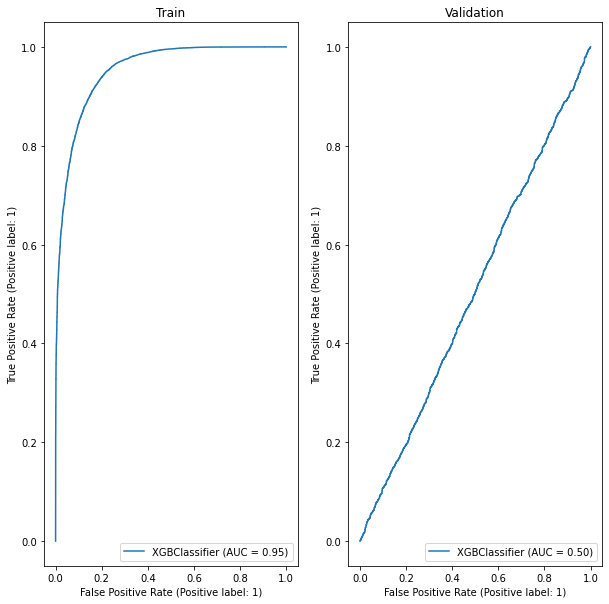

In [305]:
clf = xgb.XGBClassifier()
train_model_and_plot(clf, X_train, y_train,  X_validation, y_validation)

[23:47:17] ======== Monitor: Learner ========
[23:47:17] Configure: 0.000231s, 1 calls @ 231us

[23:47:17] ======== Monitor: GBTree ========
[23:47:17] ======== Monitor: TreePruner ========
[23:47:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "early_stopping_rounds", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:47:19] DEBUG: /Users/travis/build/dmlc/xgboost/src/gbm/gbtree.cc:155: Using tree method: 2
[23:47:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 1060 extra nodes, 0 pruned nodes, max_depth=70
[23:47:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 1292 extra nodes, 0 pruned nodes, max_depth=57
[23:47:39] INFO: /Users/travis/build/dm

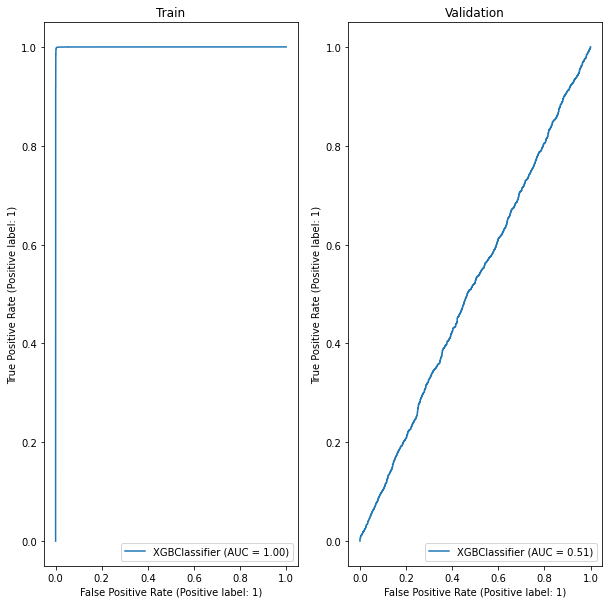

In [307]:
clf = xgb.XGBClassifier(max_depth=250, objective = 'binary:logistic', eval_metric=  'error',
                         n_jobs=10, subsample=0.25, random_state=seed, verbosity=3,
                        colsample_bynode = 0.5,
                         n_estimators = 100, use_label_encoder=False,
                        verbose=True, early_stopping_rounds=10,
                       )

train_model_and_plot(clf, X_train, y_train,  X_validation, y_validation)

[00:04:18] ======== Monitor: Learner ========
[00:04:18] Configure: 0.000247s, 1 calls @ 247us

[00:04:18] ======== Monitor: GBTree ========
[00:04:18] ======== Monitor: TreePruner ========
[00:04:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "early_stopping_rounds", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:04:19] DEBUG: /Users/travis/build/dmlc/xgboost/src/gbm/gbtree.cc:155: Using tree method: 2
[00:04:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 130 extra nodes, 0 pruned nodes, max_depth=20
[00:04:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 220 extra nodes, 0 pruned nodes, max_depth=20
[00:04:26] INFO: /Users/travis/build/dmlc

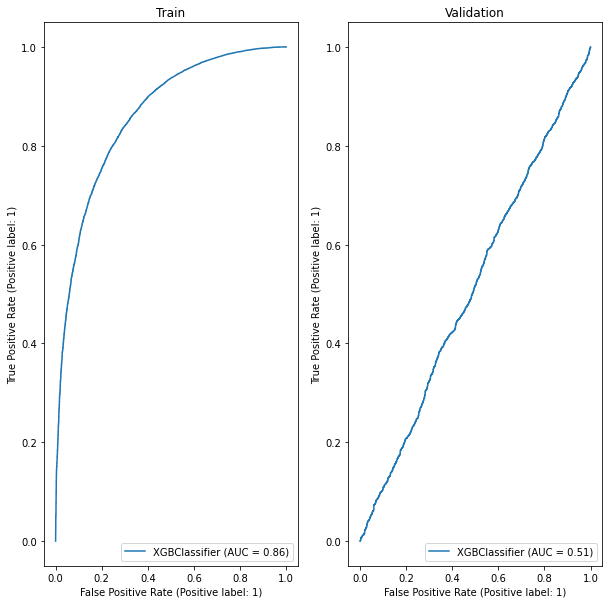

In [313]:
clf = xgb.XGBClassifier(max_depth=25, objective = 'binary:logistic', eval_metric=  'error',
                         n_jobs=10, subsample=0.25, random_state=seed, verbosity=3,
                        colsample_bynode = 0.5,
                         n_estimators = 100, use_label_encoder=False,
                        verbose=True, early_stopping_rounds=10,
                        min_child_weight=15
                       )

train_model_and_plot(clf, X_train, y_train,  X_validation, y_validation)

### feature preprocessing 

In [317]:
columns = X_train.columns
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_train_std_df = pd.DataFrame(X_train_std, columns = columns)
X_train_std_df.head(5)

,mesaurement_#_0,mesaurement_#_1,mesaurement_#_2,mesaurement_#_3,mesaurement_#_4,mesaurement_#_5,mesaurement_#_6,mesaurement_#_7,mesaurement_#_8,mesaurement_#_9,...,mesaurement_#_1551,mesaurement_#_1552,mesaurement_#_1553,mesaurement_#_1554,mesaurement_#_1556,mesaurement_#_1557,mesaurement_#_1558,mesaurement_#_1559,mesaurement_#_1561,mesaurement_#_1562
0,1.589197,0.829587,-0.982053,-0.010572,1.612610,1.613332,0.009649,1.603280,-0.982053,-0.982053,...,-0.982395,-0.01057,1.612599,1.613333,1.603271,-0.982395,-0.982395,0.886714,0.875545,-0.982395
1,-1.276004,-0.624446,1.040774,-0.010572,-1.294216,-1.293480,0.009649,-1.301545,1.040774,1.040774,...,1.040709,-0.01057,-1.294532,-1.293789,-1.301872,1.040709,1.040709,-1.036308,-1.031576,1.040709
2,0.906128,-1.172343,-0.982053,-0.010572,0.907669,0.907067,0.009649,0.918650,-0.982053,-0.982053,...,-0.982395,-0.01057,0.907640,0.907014,0.918596,-0.982395,-0.982395,0.886714,0.875545,-0.982395
3,-0.034490,1.166754,1.040774,-0.010572,-0.048309,-0.048670,0.009649,-0.021168,1.040774,1.040774,...,1.040709,-0.01057,-0.048455,-0.048826,-0.021313,1.040709,1.040709,-1.036308,-1.031576,1.040709
4,1.403862,-0.645519,-0.982053,-0.010572,1.430497,1.430837,0.009649,1.428425,-0.982053,-0.982053,...,-0.982395,-0.01057,1.430482,1.430836,1.428416,-0.982395,-0.982395,0.886714,0.875545,-0.982395


In [318]:
X_validation_std = scaler.transform(X_validation)
X_validation_std_df = pd.DataFrame(X_validation_std, columns = columns)
X_validation_std_df.head(5)

,mesaurement_#_0,mesaurement_#_1,mesaurement_#_2,mesaurement_#_3,mesaurement_#_4,mesaurement_#_5,mesaurement_#_6,mesaurement_#_7,mesaurement_#_8,mesaurement_#_9,...,mesaurement_#_1551,mesaurement_#_1552,mesaurement_#_1553,mesaurement_#_1554,mesaurement_#_1556,mesaurement_#_1557,mesaurement_#_1558,mesaurement_#_1559,mesaurement_#_1561,mesaurement_#_1562
0,0.398809,1.166754,-0.982053,-0.010572,0.341493,0.340684,0.009649,0.375041,-0.982053,-0.982053,...,-0.982395,-0.01057,0.341404,0.340579,0.374941,-0.982395,-0.982395,0.886714,0.875545,-0.982395
1,1.668379,0.387055,-0.982053,-0.010572,1.666564,1.667340,0.009649,1.641782,-0.982053,-0.982053,...,-0.982395,-0.01057,1.666555,1.667341,1.641773,-0.982395,-0.982395,0.886714,0.875545,-0.982395
2,-1.347829,-0.582300,1.040774,-0.010572,-1.315063,-1.314555,0.009649,-1.323639,1.040774,1.040774,...,1.040709,-0.01057,-1.315379,-1.314864,-1.323966,1.040709,1.040709,-1.036308,-1.031576,1.040709
3,1.624550,1.777870,-0.982053,-0.010572,1.642365,1.642976,0.009649,1.633185,-0.982053,-0.982053,...,-0.982395,-0.01057,1.642355,1.642978,1.633176,-0.982395,-0.982395,0.886714,0.875545,-0.982395
4,0.698740,-0.645519,-0.982053,-0.010572,0.623663,0.624524,0.009649,0.632817,-0.982053,-0.982053,...,-0.982395,-0.01057,0.623626,0.624468,0.632764,-0.982395,-0.982395,0.886714,0.875545,-0.982395


In [ ]:
#### LogisticRegression

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


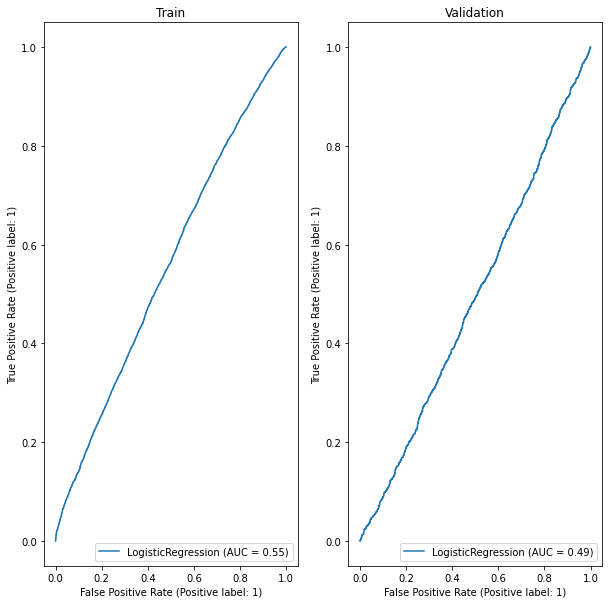

In [337]:
clf = LogisticRegression(random_state=seed, class_weight = 'balanced')
train_model_and_plot(clf, X_train_std_df, y_train,  X_validation_std_df, y_validation)

#### KNeighborsClassifier

[00:37:34] ======== Monitor: Learner ========
[00:37:34] Configure: 0.000251s, 1 calls @ 251us

[00:37:34] ======== Monitor: GBTree ========
[00:37:34] ======== Monitor: TreePruner ========


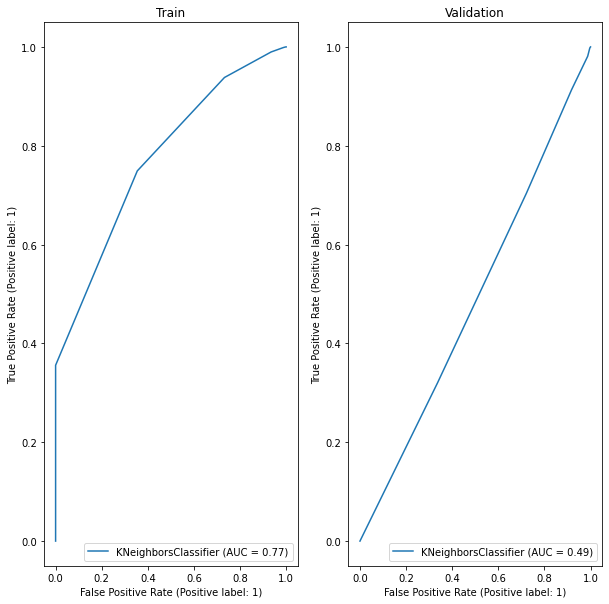

In [336]:
clf = KNeighborsClassifier(n_neighbors = 10)
train_model_and_plot(clf, X_train_std_df, y_train,  X_validation_std_df, y_validation)

#### with dimentionality reduction

In [341]:
pca = PCA(n_components=250)
X_train_lower_dimension_df = pca.fit_transform(X_train_std)
X_validation_lower_dimension_df = pca.transform(X_validation_std)

[00:36:18] ======== Monitor: Learner ========
[00:36:18] Configure: 0.000251s, 1 calls @ 251us

[00:36:18] ======== Monitor: GBTree ========
[00:36:18] ======== Monitor: TreePruner ========
[00:36:18] DEBUG: /Users/travis/build/dmlc/xgboost/src/gbm/gbtree.cc:155: Using tree method: 2


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:36:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[00:36:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:36:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[00:36:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[00:36:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[00:36:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[00

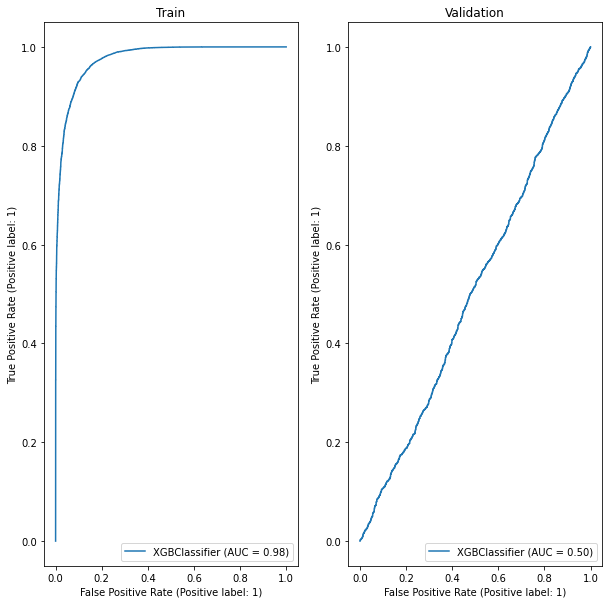

In [335]:
clf = xgb.XGBClassifier()

train_model_and_plot(clf, X_train_lower_dimension_df, y_train,  X_validation_lower_dimension_df, y_validation)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


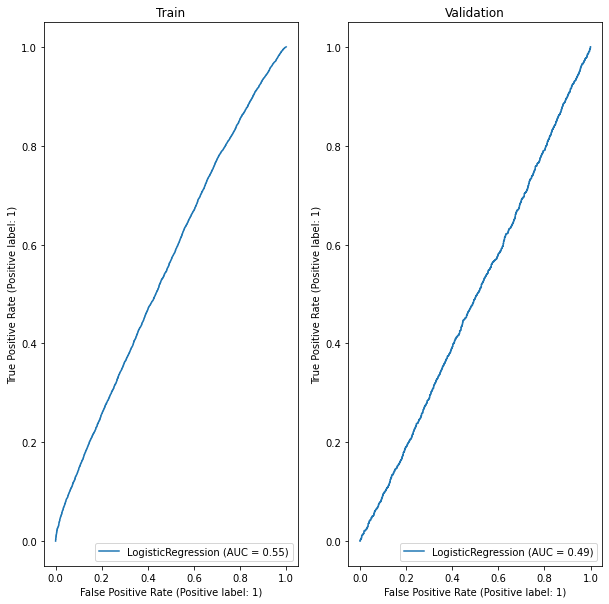

In [343]:
clf = LogisticRegression(random_state=seed, class_weight = 'balanced')
train_model_and_plot(clf, X_train_lower_dimension_df, y_train,  X_validation_lower_dimension_df, y_validation)